In [19]:
import tensorflow as tf
import numpy as np
import os
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
from tensorflow import keras
from PIL import Image

In [20]:
IMG_SIZE = 192
MODEL_NAME = "flower_network/1"
IMG_PATH = "data/"

In [21]:
def load_images(data_path):
    data, labels = [], []
    dirs = [os.path.join(data_path, y) for y in os.listdir(data_path)]
    for directory in dirs:
        images = [os.path.join(directory, y) for y in os.listdir(directory)]
        for image_path in images:
            # Only open images             
            if('.jpeg' in image_path):
                data.append(image_path)
                labels.append(directory.partition(os.sep)[2])
            
    print(data)       
    return (data, labels)

In [22]:
def preprocess_image(img_path):
    originalImage = Image.open(img_path)
    image = originalImage.resize((IMG_SIZE, IMG_SIZE))
    image = np.asarray(image) / 255
    image = tf.expand_dims(image, 0)
    input_data = {'instances': np.asarray(image).astype(float)}
    return input_data

In [23]:
def display(image, predicted_label, confidence_score, actual_label):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle(f'Predicted: {predicted_label}     Score: {confidence_score}     Actual: {actual_label}', \
                 fontsize='xx-large', fontweight='extra bold')
    ax.imshow(image, aspect='auto')
    ax.axis('off')
    plt.show()

In [24]:
def predict(image_path, actual_label):
    input_data = preprocess_image(image_path)
    
    result = model.predict(input_data)
    CLASSES = info.features['label'].names
    predicted_class_idx = np.argmax(result[0])
    print(predicted_class_idx)
    predicted_class_label = CLASSES[predicted_class_idx]
    print(predicted_class_label)
    predicted_score = round(result[0][predicted_class_idx], 4)
    original_image = Image.open(image_path)
    display(original_image, predicted_class_label, predicted_score, actual_label)

In [28]:
# _, info = tfds.load('oxford_flowers102', with_info=True)
_, info = tfds.load('tf_flowers', with_info=True)
info.features['label'].names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [26]:
model = keras.models.load_model(MODEL_NAME, compile=True)
images, labels = load_images(IMG_PATH)

['data/dandelion/dandelion2.jpeg', 'data/dandelion/dandelion1.jpeg', 'data/dandelion/dandelion3.jpeg', 'data/roses/rose1.jpeg', 'data/roses/rose2.jpeg', 'data/daisy/daisy2.jpeg', 'data/daisy/daisy1.jpeg', 'data/sunflowers/sunflower2.jpeg', 'data/sunflowers/sunflower1.jpeg', 'data/tulips/tulip1.jpeg', 'data/tulips/tulip2.jpeg']


0
dandelion


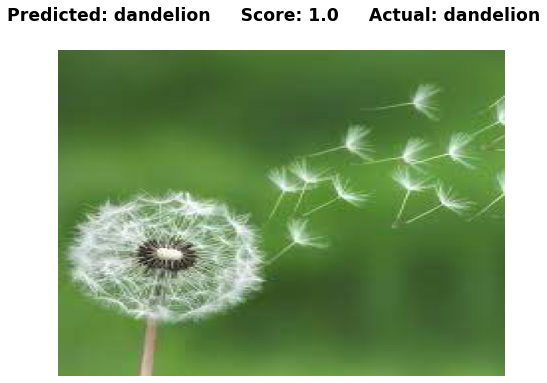

0
dandelion


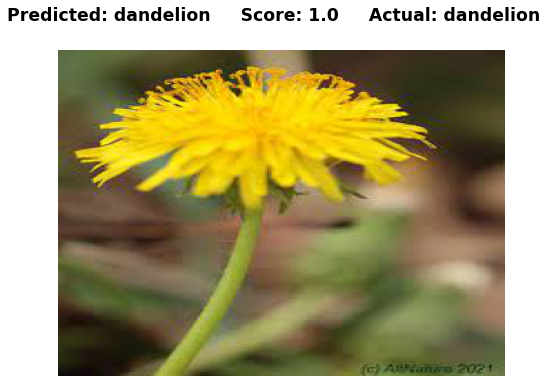

0
dandelion


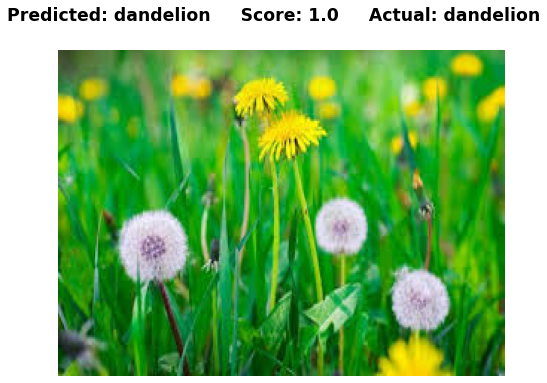

4
roses


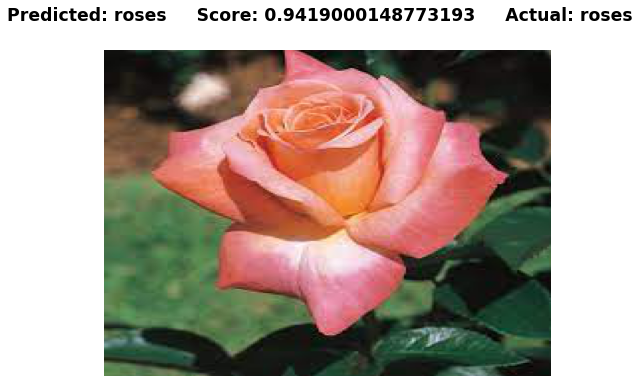

4
roses


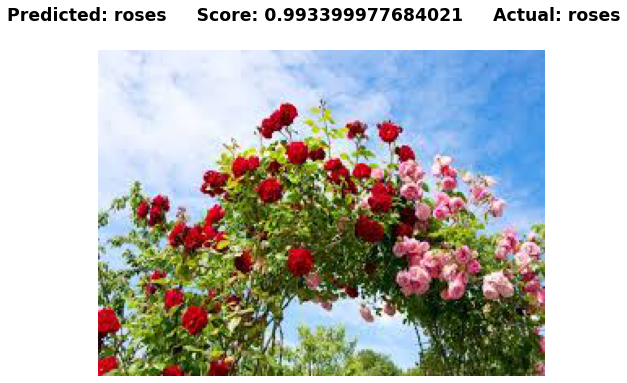

1
daisy


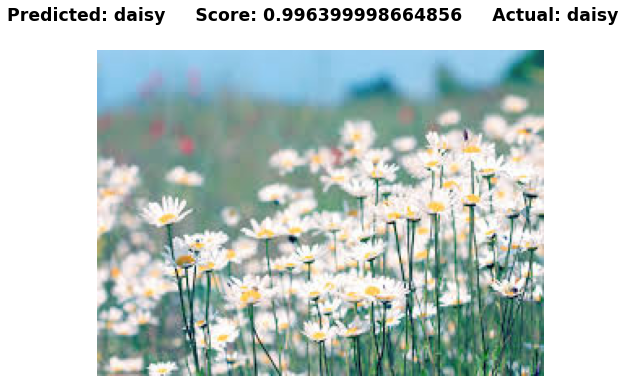

1
daisy


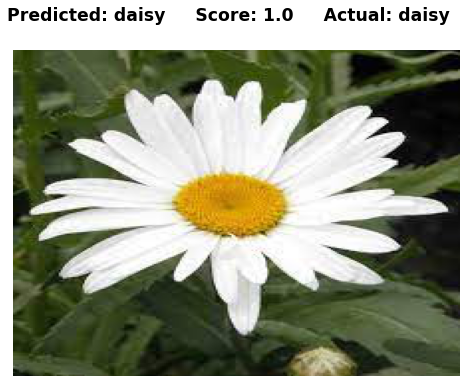

2
tulips


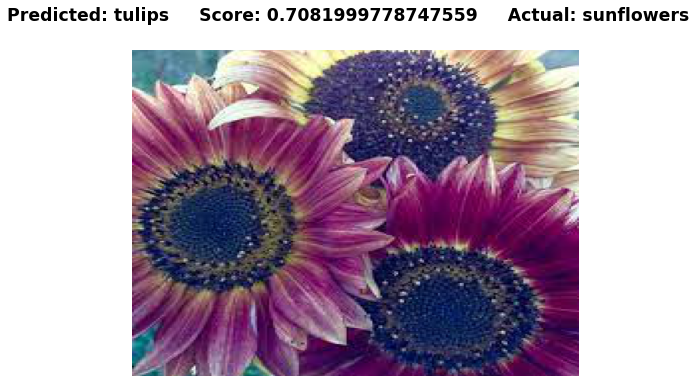

3
sunflowers


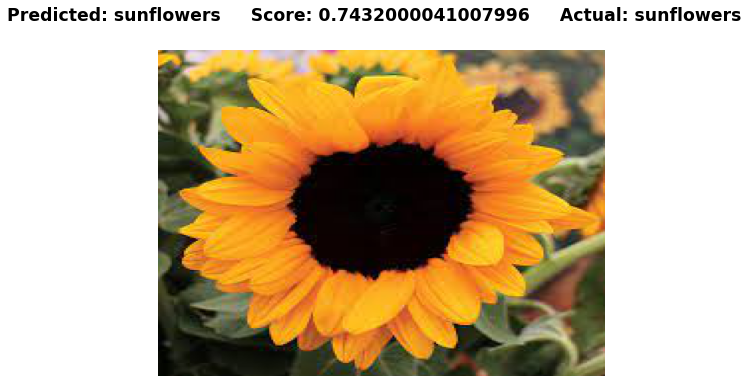

2
tulips


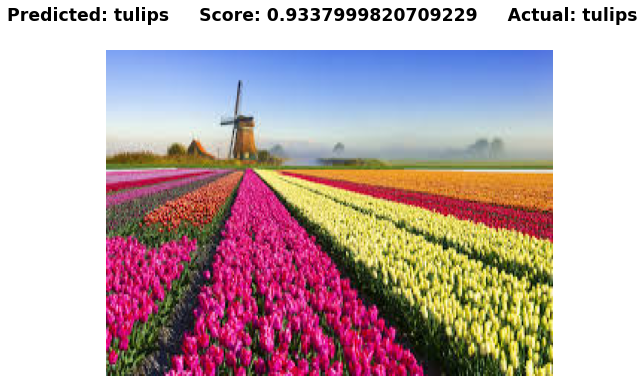

2
tulips


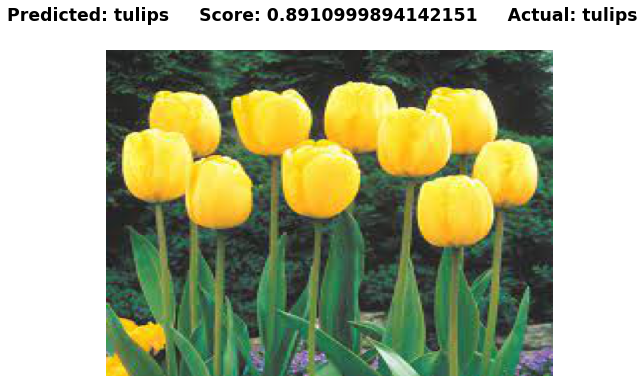

In [27]:
for image, label in zip(images, labels):
    predict(image, label)